In [144]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from bjontegaard_metric import *

In [145]:
def frame_to_frame_quality(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    camera_positions = ['6x6']
    scenes = ['ArchVizInterior']
    QPs = [20]
    synthesizers = ['AdditiveSynthesizer']
    pose_traces = [f'pose{i}' for i in range(10)]

    dir_paths = []

    for camera_position in camera_positions:
        for scene in scenes:
            for QP in QPs:
                for synthesizer in synthesizers:
                    for pose_trace in pose_traces:
                        dir_paths.append(f'./psnr/{synthesizer}/{camera_position}_{scene}_rec{QP}_{synthesizer}_{pose_trace}_psnr.csv')
    
    df = pd.DataFrame()
    for i in range(len(dir_paths)):
        df_tmp = pd.read_csv(dir_paths[i])
        df_tmp.insert(df_tmp.shape[1], 'pose', f'pose{i}')
        df = df.append(df_tmp)

    df_tmp = df
    df_tmp = df_tmp.loc[(df_tmp['pose'] == 'pose0') ^ (df_tmp['pose'] == 'pose2') ^ (df_tmp['pose'] == 'pose4')]

    # PSNR    
    ax = sns.lineplot(x='Frame', y=f'psnr_y', style='pose', data=df_tmp)
    ax.set(xlabel="Frame", ylabel=f"PSNR (dB)")
    plt.legend(title="")
    plt.xlim((0,90))
    plt.ylim((0,33)) 
    plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300)
    plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300)
    # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
    # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.lineplot(x='Frame', y=f'float_ssim', style='pose', data=df_tmp)
    ax.set(xlabel="Frame", ylabel=f"SSIM")
    plt.legend(title="")
    plt.xlim((0,90))
    plt.ylim((0,1)) 
    plt.savefig(f'./img/frame_to_frame_quality/ssim_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300)
    plt.savefig(f'./img/frame_to_frame_quality/ssim_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300)
    # plt.savefig(f'./img/frame_to_frame_quality/ssim_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
    # plt.savefig(f'./img/frame_to_frame_quality/ssim_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.lineplot(x='Frame', y=f'vmaf', style='pose', data=df_tmp)
    ax.set(xlabel="Frame", ylabel=f"VMAF")
    plt.legend(title="")
    plt.xlim((0,90))
    plt.ylim((0,100))   
    plt.savefig(f'./img/frame_to_frame_quality/vmaf_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300)
    plt.savefig(f'./img/frame_to_frame_quality/vmaf_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300)
    # plt.savefig(f'./img/frame_to_frame_quality/vmaf_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
    # plt.savefig(f'./img/frame_to_frame_quality/vmaf_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

In [146]:
def scene_average_quality(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all_nG1.csv')
    df = df.append(df_tmp)

    camera_position = '6x6'
    scene = 'ArchVizInterior'
    QP = 20
    synthesizer = 'AdditiveSynthesizer'

    df_tmp = df
    df_tmp = df_tmp.loc[(df_tmp['camera_position'] == camera_position) &
                        (df_tmp['scene'] == scene) &
                        (df_tmp['QP'] == QP) &
                        (df_tmp['synthesizer'] == synthesizer)]
    
    df_tmp = df_tmp.sort_values('psnr_mean', ascending=False)
    df_tmp['new_pose_traces'] = [f'pose{i}' for i in range(10)]

    # PSNR
    ax = sns.barplot(x='new_pose_traces', y=f'psnr_mean', data=df_tmp)
    ax.set(xlabel="Trajectory", ylabel=f"PSNR (dB)")
    plt.ylim((0,33)) 
    plt.savefig(f'./img/average_quality/psnr_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/psnr_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x='new_pose_traces', y=f'ssim_mean', data=df_tmp)
    ax.set(xlabel="Trajectory", ylabel=f"SSIM")
    plt.ylim((0,1))   
    plt.savefig(f'./img/average_quality/ssim_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/ssim_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x='new_pose_traces', y=f'vmaf_mean', data=df_tmp)
    ax.set(xlabel="Trajectory", ylabel=f"VMAF")
    plt.ylim((0,100))   
    plt.savefig(f'./img/average_quality/vmaf_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/vmaf_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

In [147]:
def average_quality(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all_nG1.csv')
    df = df.append(df_tmp)

    camera_position = '6x6'
    QP = 20
    synthesizer = 'AdditiveSynthesizer'

    df_tmp = df
    df_tmp = df_tmp.loc[(df_tmp['camera_position'] == camera_position) &
                        (df_tmp['QP'] == QP) &
                        (df_tmp['synthesizer'] == synthesizer)]

    df_tmp['scene'] = df_tmp['scene'].replace(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'],
                                                ['Arch', 'Light', 'Office', 'Real', 'Xoio'])
    
    # PSNR
    ax = sns.barplot(x='scene', y=f'psnr_mean', data=df_tmp, ci=None)
    ax.set(xlabel="Scene", ylabel=f"PSNR (dB)")
    plt.ylim((0,33)) 
    plt.savefig(f'./img/average_quality/psnr_scene_in_6x6_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/psnr_scene_in_6x6_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x='scene', y=f'ssim_mean', data=df_tmp, ci=None)
    ax.set(xlabel="Scene", ylabel=f"SSIM")
    plt.ylim((0,1))   
    plt.savefig(f'./img/average_quality/ssim_scene_in_6x6_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/ssim_scene_in_6x6_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x='scene', y=f'vmaf_mean', data=df_tmp, ci=None)
    ax.set(xlabel="Scene", ylabel=f"VMAF")
    plt.ylim((0,100))   
    plt.savefig(f'./img/average_quality/vmaf_scene_in_6x6_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/vmaf_scene_in_6x6_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

In [148]:
def synthesizer_individual(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    '''
    Compare two synthesizers in different scenes
    QP = 20
    numGroup = 1
    camera positions = '6x6'
    all pose traces
    '''
    doplot = True

    # plot set start
    palette=sns.color_palette("tab10")
    sns.set_theme(font='Times New Roman', font_scale=1.5)
    sns.set_style("white")
    # plot set end
    
    df = pd.DataFrame()
    df = pd.read_csv(f'./results/all_nG1.csv')

    df_tmp = df
    # don't discuss sphere_6x6 camera placement 
    df_tmp = df_tmp.loc[(df_tmp["camera_position"] != 'sphere_6x6')]
    # set filter
    df_tmp = df_tmp.loc[(df_tmp['QP'] == 20)]
    df_tmp = df_tmp.loc[(df_tmp['camera_position'] == '6x6')]
    # change synthesizer name
    df_tmp['synthesizer'] = df_tmp['synthesizer'].replace(['AdditiveSynthesizer','ViewWeightingSynthesizer'],['RVS', 'VWS'])
    # change scene name
    df_tmp['scene'] = df_tmp['scene'].replace(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'], ['Arch', 'Light', 'Office', 'Real', 'Xoio'])
    
    # PSNR
    ax = sns.barplot(x=f'scene', y=f'psnr_mean', hue=f'synthesizer', data=df_tmp, palette=palette)
    ax.set(xlabel="Scene", ylabel=f"Quality in PSNR (dB)")
    plt.ylim((0,32))
    plt.legend(title='', loc='lower right')
    if doplot:
        plt.savefig(f'./img/synthesizer_individual/psnr_scene_synthesizer_in_rec20.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'./img/synthesizer_individual/psnr_scene_synthesizer_in_rec20.png', dpi=300, pad_inches=0, bbox_inches='tight')
    plt.show()

    
    # SSIM
    ax = sns.barplot(x=f'scene', y=f'ssim_mean', hue=f'synthesizer', data=df_tmp, palette=palette)
    ax.set(xlabel="Scene", ylabel=f"Quality in SSIM")
    plt.ylim((0,1))
    plt.legend(title='', loc='lower right')
    if doplot:
        plt.savefig(f'./img/synthesizer_individual/ssim_scene_synthesizer_in_rec20.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'./img/synthesizer_individual/ssim_scene_synthesizer_in_rec20.png', dpi=300, pad_inches=0, bbox_inches='tight')
    plt.show()

    # VMAF
    ax = sns.barplot(x=f'scene', y=f'vmaf_mean', hue=f'synthesizer', data=df_tmp, palette=palette)
    ax.set(xlabel="Scene", ylabel=f"Quality in VMAF")
    plt.ylim((0,100))
    plt.legend(title='', loc='lower right')
    if doplot:
        plt.savefig(f'./img/synthesizer_individual/vmaf_scene_synthesizer_in_rec20.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'./img/synthesizer_individual/vmaf_scene_synthesizer_in_rec20.png', dpi=300, pad_inches=0, bbox_inches='tight')
    plt.show()

    # TMIV encoding time
    ax = sns.barplot(x=f'scene', y=f'TMIV_decoding_time', hue=f'synthesizer', data=df_tmp, palette=palette)
    ax.set(xlabel="Scene", ylabel=f"TMIV Decoding Time (sec)")
    plt.ylim((0,3000)) 
    plt.legend(title='', loc='lower right')
    if doplot:
        plt.savefig(f'./img/synthesizer_individual/TMIV_decoding_time_scene_synthesizer_in_rec20.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'./img/synthesizer_individual/TMIV_decoding_time_scene_synthesizer_in_rec20.png', dpi=300, pad_inches=0, bbox_inches='tight')
    plt.show()

    for scene in ['Arch', 'Light', 'Office', 'Real', 'Xoio']:
        print(f'{scene} vmaf and TMIV decoding time')
        print('RVS-based: ', (df_tmp.loc[(df_tmp['synthesizer'] == 'RVS') & (df_tmp['scene'] == scene)])['vmaf_mean'].mean(), 
                ',', (df_tmp.loc[(df_tmp['synthesizer'] == 'RVS') & (df_tmp['scene'] == scene)])['TMIV_decoding_time'].mean())

        print('VWS: ', (df_tmp.loc[(df_tmp['synthesizer'] == 'VWS') & (df_tmp['scene'] == scene)])['vmaf_mean'].mean(), 
                ',', (df_tmp.loc[(df_tmp['synthesizer'] == 'VWS') & (df_tmp['scene'] == scene)])['TMIV_decoding_time'].mean())

In [149]:
def siti_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    '''
    Calculate SI and TI in every scenes and every pose traces
    '''
    doplot = True
    
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/scene_siti.csv')
    df = df.append(df_tmp)
    # change scene name
    df['scene'] = df['scene'].replace(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'], ['Arch', 'Light', 'Office', 'Real', 'Xoio'])
    
    
    data = []
    for scene in ['Arch', 'Light', 'Office', 'Real', 'Xoio']:
        df_tmp = df.loc[(df["scene"] == scene)]
        si = df_tmp['si'].sum()/10
        ti = df_tmp['ti'].sum()/10
        data.append([scene, si, ti])
    df_average = pd.DataFrame(data, columns=["scene", "si", "ti"])
    print(df_average)

    # TI-SI plot (average)
    ax = sns.scatterplot(x='si', y=f'ti', hue='scene', data=df_average, style='scene', s=70)
    ax.set(xlabel="Spatial Information", ylabel=f"Temporal Information")
    plt.legend(title="")
    if doplot:
        plt.savefig(f'./img/synthesizer_individual/siti_average.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_individual/siti_average.png', dpi=300)
    plt.show()

    # TI-SI plot (all)
    df_all = df
    ax = sns.scatterplot(x='si', y=f'ti', hue='scene', data=df_all, style='scene', s=70)
    ax.set(xlabel="Spatial Information", ylabel=f"Temporal Information")
    plt.legend(title="")
    if doplot:
        plt.savefig(f'./img/synthesizer_individual/siti.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_individual/siti.png', dpi=300)
    plt.show()

In [150]:
def synthesizer_average(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    '''
    Compare two synthesizers
    QP = 20
    numGroup = 1
    camera positions = '6x6'
    all scene
    all pose traces
    '''
    doplot = False

    df = pd.DataFrame()
    df = pd.read_csv(f'./results/all_nG1.csv')

    df_tmp = df
    # don't discuss sphere_6x6 camera placement 
    df_tmp = df_tmp.loc[(df_tmp["camera_position"] != 'sphere_6x6')]
    df_tmp = df_tmp.loc[(df_tmp['QP'] == 20)]
    df_tmp = df_tmp.loc[(df_tmp['camera_position'] == '6x6')]
    # change synthesizer name
    df_tmp['synthesizer'] = df_tmp['synthesizer'].replace(['AdditiveSynthesizer','ViewWeightingSynthesizer'],['RVS-based', 'VWS'])

    # PSNR
    ax = sns.barplot(x=f'synthesizer', y=f'psnr_mean', data=df_tmp, ci=None)
    ax.set(xlabel="Synthesizer", ylabel=f"PSNR (dB)")
    plt.ylim((0,30))
    if doplot:
        plt.savefig(f'./img/synthesizer_average/psnr_synthesizer_in_rec20.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_average/psnr_synthesizer_in_rec20.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x=f'synthesizer', y=f'ssim_mean', data=df_tmp, ci=None)
    ax.set(xlabel="Synthesizer", ylabel=f"SSIM")
    plt.ylim((0,1))
    if doplot: 
        plt.savefig(f'./img/synthesizer_average/ssim_synthesizer_in_rec20.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_average/ssim_synthesizer_in_rec20.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x=f'synthesizer', y=f'vmaf_mean', data=df_tmp, ci=None)
    ax.set(xlabel="Synthesizer", ylabel=f"VMAF")
    plt.ylim((0,100))
    if doplot:
        plt.savefig(f'./img/synthesizer_average/vmaf_synthesizer_in_rec20.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_average/vmaf_synthesizer_in_rec20.png', dpi=300)
    plt.show()

    # TMIV encoding time
    ax = sns.barplot(x=f'synthesizer', y=f'TMIV_decoding_time', data=df_tmp, ci=None)
    ax.set(xlabel="Synthesizer", ylabel=f"TMIV Decoding Time (sec)")
    plt.ylim((0,3000)) 
    if doplot:
        plt.savefig(f'./img/synthesizer_average/TMIV_decoding_time_synthesizer_in_rec20.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_average/TMIV_decoding_time_synthesizer_in_rec20.png', dpi=300)
    plt.show()

    print('RVS-based: ', (df_tmp.loc[(df_tmp['synthesizer'] == 'RVS-based')])['TMIV_decoding_time'].mean())
    print('VWS: ', (df_tmp.loc[(df_tmp['synthesizer'] == 'VWS')])['TMIV_decoding_time'].mean())

    # VMAF propotion plot -> CDF
    df_tmp_RVS = df_tmp.loc[(df_tmp[f'synthesizer'] == 'RVS-based')]
    df_tmp_RVS = df_tmp_RVS.sort_values(by=['vmaf_mean'])
    RVS_vmaf_sort_data = df_tmp_RVS['vmaf_mean'].to_list()
    RVS_y = 1. * np.arange(len(RVS_vmaf_sort_data)) / (len(RVS_vmaf_sort_data) - 1)

    df_tmp_VWS = df_tmp.loc[(df_tmp[f'synthesizer'] == 'VWS')]
    df_tmp_VWS = df_tmp_VWS.sort_values(by=['vmaf_mean'])
    VWS_vmaf_sort_data = df_tmp_VWS['vmaf_mean'].to_list()
    VWS_y = 1. * np.arange(len(VWS_vmaf_sort_data)) / (len(VWS_vmaf_sort_data) - 1)

    ax = sns.lineplot(x=RVS_vmaf_sort_data, y=RVS_y)
    ax = sns.lineplot(x=VWS_vmaf_sort_data, y=VWS_y)
    ax.lines[1].set_linestyle("--")
    ax.set(xlabel="VMAF", ylabel=f"Propotion")
    plt.legend(['RVS-based', 'VWS'], title="")
    plt.ylim((0,1))
    if doplot: 
        plt.savefig(f'./img/synthesizer_average/propotion_vmaf_synthesizer_in_rec20.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_average/propotion_vmaf_synthesizer_in_rec20.png', dpi=300)
    plt.show()

    # Calculate the p-value
    RVS_psnr = np.array((df_tmp.loc[(df_tmp[f'synthesizer'] == 'RVS-based')])['psnr_mean'].to_numpy())
    VWS_psnr = np.array((df_tmp.loc[(df_tmp[f'synthesizer'] == 'VWS')])['psnr_mean'].to_numpy())
    print('psnr: ', stats.ttest_ind(RVS_psnr, VWS_psnr, equal_var=False))

    RVS_ssim = np.array((df_tmp.loc[(df_tmp[f'synthesizer'] == 'RVS-based')])['ssim_mean'].to_numpy())
    VWS_ssim = np.array((df_tmp.loc[(df_tmp[f'synthesizer'] == 'VWS')])['ssim_mean'].to_numpy())
    print('ssim: ', stats.ttest_ind(RVS_ssim, VWS_ssim, equal_var=False))
    
    RVS_vmaf = np.array((df_tmp.loc[(df_tmp[f'synthesizer'] == 'RVS-based')])['vmaf_mean'].to_numpy())
    VWS_vmaf = np.array((df_tmp.loc[(df_tmp[f'synthesizer'] == 'VWS')])['vmaf_mean'].to_numpy())
    print('vmaf: ', stats.ttest_ind(RVS_vmaf, VWS_vmaf, equal_var=False))   

In [151]:
def QP_average(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    '''
    Compare different QPs
    synthesizer = 'AdditiveSynthesizer'
    numGroup = 1
    camera positions = '6x6'
    all pose traces
    all scenes
    '''
    doplot = False
    
    df = pd.DataFrame()
    df = pd.read_csv(f'./results/all_nG1.csv')

    df_tmp = df
    # don't discuss sphere_6x6 camera placement 
    df_tmp = df_tmp.loc[(df_tmp["camera_position"] != 'sphere_6x6')]
    # set filter
    df_tmp = df_tmp.loc[(df_tmp['synthesizer'] == 'AdditiveSynthesizer')]
    df_tmp = df_tmp.loc[(df_tmp['camera_position'] == '6x6')]

    # PSNR
    ax = sns.barplot(x=f'QP', y=f'psnr_mean', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"PSNR (dB)")
    plt.ylim((0,30))
    if doplot:
        plt.savefig(f'./img/QP_average/psnr_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/psnr_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x=f'QP', y=f'ssim_mean', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"SSIM")
    plt.ylim((0,1))
    if doplot:
        plt.savefig(f'./img/QP_average/ssim_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/ssim_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x=f'QP', y=f'vmaf_mean', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"VMAF")
    plt.ylim((0,100))
    if doplot:
        plt.savefig(f'./img/QP_average/vmaf_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/vmaf_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # TMIV decoding time
    ax = sns.barplot(x=f'QP', y=f'TMIV_decoding_time', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"TMIV Decoding Time (sec)")
    # plt.ylim((0,3000))
    if doplot:
        plt.savefig(f'./img/QP_average/TMIV_decoding_time_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/TMIV_decoding_time_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # x265 encoding time
    ax = sns.barplot(x=f'QP', y=f'x265_encoding_time', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"x265 Encoding Time (sec)")
    # plt.ylim((0,3000))
    if doplot:
        plt.savefig(f'./img/QP_average/x265_encoding_time_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/x265_encoding_time_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # x265 encoding time
    ax = sns.barplot(x=f'QP', y=f'x265_decoding_time', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"x265 Decoding Time (sec)")
    # plt.ylim((0,3000))
    if doplot:
        plt.savefig(f'./img/QP_average/x265_decoding_time_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/x265_decoding_time_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    df_tmp['Mbitrate'] = df_tmp['bitrate'].apply(lambda x: x*(0.000001))
    # bitrate
    ax = sns.barplot(x=f'QP', y=f'Mbitrate', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"Bitrate (MBps)")
    # plt.ylim((0,3000))
    if doplot:
        plt.savefig(f'./img/QP_average/bitrate_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/bitrate_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    for QP in QPs:
        print(QP)
        print('VMAF: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['vmaf_mean'].mean())
        print('TMIV_decoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['TMIV_decoding_time'].mean())
        print('x265_encoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['x265_encoding_time'].mean())
        print('x265_decoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['x265_decoding_time'].mean())
        print('bitrate: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['bitrate'].mean())
    
    # change scene name
    df_tmp['scene'] = df_tmp['scene'].replace(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'], ['Arch', 'Light', 'Office', 'Real', 'Xoio'])
    
    # Do RD-curve
    ax = sns.lineplot(x=f'Mbitrate', y=f'vmaf_mean', hue='scene', data=df_tmp, ci=None)
    ax.set(xlabel="Bitrate (Mbps)", ylabel=f"VMAF")
    plt.ylim((0,100))
    plt.legend(title='', loc='lower right')
    if doplot:
        plt.savefig(f'./img/QP_average/RDcurve_vmaf_bitrate_scene_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/RDcurve_vmaf_bitrate_scene_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()


In [152]:
def QP_camera(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    '''
    Compare different QPs in different camera position
    synthesizer = 'AdditiveSynthesizer'
    scene = 'ArchVizInterior'
    numGroup = 1
    all camera positions
    all pose traces
    '''
    doplot = False
    
    df = pd.DataFrame()
    df = pd.read_csv(f'./results/all_nG1.csv')

    df_tmp = df
    # don't discuss sphere_6x6 camera placement 
    df_tmp = df_tmp.loc[(df_tmp["camera_position"] != 'sphere_6x6')]
    # set filter
    df_tmp = df_tmp.loc[(df_tmp['synthesizer'] == 'AdditiveSynthesizer')]
    
    # PSNR
    ax = sns.barplot(x=f'QP', y=f'psnr_mean', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"PSNR (dB)")
    plt.ylim((0,30))
    plt.legend(title='', loc='lower left')
    if doplot:
        plt.savefig(f'./img/QP_camera/psnr_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/psnr_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x=f'QP', y=f'ssim_mean', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"SSIM")
    plt.ylim((0,1))
    plt.legend(title='', loc='lower left')
    if doplot:
        plt.savefig(f'./img/QP_camera/ssim_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/ssim_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x=f'QP', y=f'vmaf_mean', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"VMAF")
    plt.ylim((0,100))
    plt.legend(title='', loc='lower left')
    if doplot:
        plt.savefig(f'./img/QP_camera/vmaf_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/vmaf_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # TMIV decoding time
    ax = sns.barplot(x=f'QP', y=f'TMIV_decoding_time', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"TMIV Decoding Time (sec)")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='lower left')
    if doplot:
        plt.savefig(f'./img/QP_camera/TMIV_decoding_time_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/TMIV_decoding_time_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # x265 encoding time
    ax = sns.barplot(x=f'QP', y=f'x265_encoding_time', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"x265 Encoding Time (sec)")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='upper right')
    if doplot:
        plt.savefig(f'./img/QP_camera/x265_encoding_time_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/x265_encoding_time_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # x265 encoding time
    ax = sns.barplot(x=f'QP', y=f'x265_decoding_time', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"x265 Decoding Time (sec)")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='upper right')
    if doplot:
        plt.savefig(f'./img/QP_camera/x265_decoding_time_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/x265_decoding_time_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    df_tmp['Mbitrate'] = df_tmp['bitrate'].apply(lambda x: x*(0.000001))
    # bitrate
    ax = sns.barplot(x=f'QP', y=f'Mbitrate', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"Bitrate (MBps)")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='upper right')
    if doplot:
        plt.savefig(f'./img/QP_camera/bitrate_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/bitrate_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # discuss RD curve in specific scene
    df_tmp_scene = df_tmp.loc[(df_tmp['scene'] == 'ArchVizInterior')]
    ax = sns.lineplot(x=f'Mbitrate', y=f'vmaf_mean', hue='camera_position', data=df_tmp_scene, ci=None)
    ax.set(xlabel="Bitrate (MBps)", ylabel=f"VMAF")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='lower right')
    if doplot:
        plt.savefig(f'./img/QP_camera/bitrate_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/bitrate_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # set 6x6 as baseline
    for camera_position in camera_positions:
        print(camera_position)

        baseline_bitrate = []
        baseline_psnr = []
        baseline_ssim = []
        baseline_vmaf = []
        test_bitrate = []
        test_psnr = []
        test_ssim = []
        test_vmaf = []

        for QP in QPs:
            baseline_bitrate.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == '6x6') & (df_tmp_scene['QP'] == QP)]['Mbitrate'].mean())
            baseline_psnr.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == '6x6') & (df_tmp_scene['QP'] == QP)]['psnr_mean'].mean())
            baseline_ssim.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == '6x6') & (df_tmp_scene['QP'] == QP)]['ssim_mean'].mean())
            baseline_vmaf.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == '6x6') & (df_tmp_scene['QP'] == QP)]['vmaf_mean'].mean())

            test_bitrate.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == camera_position) & (df_tmp_scene['QP'] == QP)]['Mbitrate'].mean())
            test_psnr.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == camera_position) & (df_tmp_scene['QP'] == QP)]['psnr_mean'].mean())  
            test_ssim.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == camera_position) & (df_tmp_scene['QP'] == QP)]['ssim_mean'].mean())  
            test_vmaf.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == camera_position) & (df_tmp_scene['QP'] == QP)]['vmaf_mean'].mean())    
        
        baseline = np.array(baseline_bitrate)
        PSNR_baseline = np.array(baseline_psnr)
        SSIM_baseline = np.array(baseline_ssim)
        VMAF_baseline = np.array(baseline_vmaf)
        
        test = np.array(test_bitrate)
        PSNR_test = np.array(test_psnr)
        SSIM_test = np.array(test_ssim)
        VMAF_test = np.array(test_vmaf)

        print('BD-PSNR: ', BD_PSNR(baseline, PSNR_baseline, test, PSNR_test))
        print('BD-RATE: ', BD_RATE(baseline, PSNR_baseline, test, PSNR_test))
        print('BD-SSIM: ', BD_PSNR(baseline, SSIM_baseline, test, SSIM_test))
        print('BD-RATE: ', BD_RATE(baseline, SSIM_baseline, test, SSIM_test))
        print('BD-VMAF: ', BD_PSNR(baseline, VMAF_baseline, test, VMAF_test))
        print('BD-RATE: ', BD_RATE(baseline, VMAF_baseline, test, VMAF_test))



    # for QP in QPs:
    #     print(QP)
    #     print('VMAF: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['vmaf_mean'].mean())
    #     print('TMIV_decoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['TMIV_decoding_time'].mean())
    #     print('x265_encoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['x265_encoding_time'].mean())
    #     print('x265_decoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['x265_decoding_time'].mean())
    #     print('bitrate: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['bitrate'].mean())

In [153]:
def arc_comparison(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    '''
    Compare different sphere_6x6 and planar_6x6
    synthesizer = 'AdditiveSynthesizer'
    numGroup = 1
    all scenes
    all pose traces
    '''
    doplot = True
    
    df = pd.DataFrame()
    df = pd.read_csv(f'./results/all_nG1.csv')

    df_tmp = df
    # only discuss sphere_6x6 and 6x6 camera placements 
    df_tmp = df_tmp.loc[(df_tmp["camera_position"] == 'sphere_6x6') ^ (df_tmp["camera_position"] == '6x6')]
    # set filter
    df_tmp = df_tmp.loc[(df_tmp['synthesizer'] == 'AdditiveSynthesizer')]
    df_tmp = df_tmp.loc[(df_tmp['scene'] == 'RealisticRendering')]
    # change camera placement name
    df_tmp['camera_position'] = df_tmp['camera_position'].replace(['6x6', 'sphere_6x6'], ['Planar 6x6', 'Arc 6x6'])
    
    
    # PSNR
    ax = sns.barplot(x=f'QP', y=f'psnr_mean', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"PSNR (dB)")
    plt.ylim((0,30))
    plt.legend(title='', loc='lower left')
    if doplot:
        plt.savefig(f'./img/arc_comparison/psnr_QP_arc_and_planar.eps', dpi=300)
        plt.savefig(f'./img/arc_comparison/psnr_QP_arc_and_planar.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x=f'QP', y=f'ssim_mean', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"SSIM")
    plt.ylim((0,1))
    plt.legend(title='', loc='lower left')
    if doplot:
        plt.savefig(f'./img/arc_comparison/ssim_QP_arc_and_planar.eps', dpi=300)
        plt.savefig(f'./img/arc_comparison/ssim_QP_arc_and_planar.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x=f'QP', y=f'vmaf_mean', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"VMAF")
    plt.ylim((0,100))
    plt.legend(title='', loc='lower left')
    if doplot:
        plt.savefig(f'./img/arc_comparison/vmaf_QP_arc_and_planar.eps', dpi=300)
        plt.savefig(f'./img/arc_comparison/vmaf_QP_arc_and_planar.png', dpi=300)
    plt.show()

    # TMIV decoding time
    ax = sns.barplot(x=f'QP', y=f'TMIV_decoding_time', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"TMIV Decoding Time (sec)")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='lower left')
    if doplot:
        plt.savefig(f'./img/arc_comparison/TMIV_decoding_time_QP_arc_and_planar.eps', dpi=300)
        plt.savefig(f'./img/arc_comparison/TMIV_decoding_time_QP_arc_and_planar.png', dpi=300)
    plt.show()

    # x265 encoding time
    ax = sns.barplot(x=f'QP', y=f'x265_encoding_time', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"x265 Encoding Time (sec)")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='upper right')
    if doplot:
        plt.savefig(f'./img/arc_comparison/x265_encoding_time_QP_arc_and_planar.eps', dpi=300)
        plt.savefig(f'./img/arc_comparison/x265_encoding_time_QP_arc_and_planar.png', dpi=300)
    plt.show()

    # x265 encoding time
    ax = sns.barplot(x=f'QP', y=f'x265_decoding_time', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"x265 Decoding Time (sec)")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='upper right')
    if doplot:
        plt.savefig(f'./img/arc_comparison/x265_decoding_time_QP_arc_and_planar.eps', dpi=300)
        plt.savefig(f'./img/arc_comparison/x265_decoding_time_QP_arc_and_planar.png', dpi=300)
    plt.show()

    df_tmp['Mbitrate'] = df_tmp['bitrate'].apply(lambda x: x*(0.000001))
    # bitrate
    ax = sns.barplot(x=f'QP', y=f'Mbitrate', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"Bitrate (MBps)")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='upper right')
    if doplot:
        plt.savefig(f'./img/arc_comparison/Mbitrate_QP_arc_and_planar.eps', dpi=300)
        plt.savefig(f'./img/arc_comparison/Mbitrate_QP_arc_and_planar.png', dpi=300)
    plt.show()

    # discuss RD curve in specific scene
    df_tmp_scene = df_tmp.loc[(df_tmp['scene'] == 'RealisticRendering')]
    ax = sns.lineplot(x=f'Mbitrate', y=f'psnr_mean', hue='camera_position', data=df_tmp_scene, ci=None)
    ax.set(xlabel="Bitrate (MBps)", ylabel=f"PSNR (dB)")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='lower right')
    if doplot:
        plt.savefig(f'./img/arc_comparison/psnr_RD_curve_arc_and_planar.eps', dpi=300)
        plt.savefig(f'./img/arc_comparison/psnr_RD_curve_arc_and_planar.png', dpi=300)
    plt.show()

    df_tmp_scene = df_tmp.loc[(df_tmp['scene'] == 'RealisticRendering')]
    ax = sns.lineplot(x=f'Mbitrate', y=f'ssim_mean', hue='camera_position', data=df_tmp_scene, ci=None)
    ax.set(xlabel="Bitrate (MBps)", ylabel=f"SSIM")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='lower right')
    if doplot:
        plt.savefig(f'./img/arc_comparison/ssim_RD_curve_arc_and_planar.eps', dpi=300)
        plt.savefig(f'./img/arc_comparison/ssim_RD_curve_arc_and_planar.png', dpi=300)
    plt.show()

    df_tmp_scene = df_tmp.loc[(df_tmp['scene'] == 'RealisticRendering')]
    ax = sns.lineplot(x=f'Mbitrate', y=f'vmaf_mean', hue='camera_position', data=df_tmp_scene, ci=None)
    ax.set(xlabel="Bitrate (MBps)", ylabel=f"VMAF")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='lower right')
    if doplot:
        plt.savefig(f'./img/arc_comparison/vmaf_RD_curve_arc_and_planar.eps', dpi=300)
        plt.savefig(f'./img/arc_comparison/vmaf_RD_curve_arc_and_planar.png', dpi=300)
    plt.show()

    # set 6x6 as baseline
    baseline_bitrate = []
    baseline_psnr = []
    baseline_ssim = []
    baseline_vmaf = []
    test_bitrate = []
    test_psnr = []
    test_ssim = []
    test_vmaf = []

    for QP in QPs:
        baseline_bitrate.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == 'Planar 6x6') & (df_tmp_scene['QP'] == QP)]['Mbitrate'].mean())
        baseline_psnr.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == 'Planar 6x6') & (df_tmp_scene['QP'] == QP)]['psnr_mean'].mean())
        baseline_ssim.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == 'Planar 6x6') & (df_tmp_scene['QP'] == QP)]['ssim_mean'].mean())
        baseline_vmaf.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == 'Planar 6x6') & (df_tmp_scene['QP'] == QP)]['vmaf_mean'].mean())

        test_bitrate.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == 'Arc 6x6') & (df_tmp_scene['QP'] == QP)]['Mbitrate'].mean())
        test_psnr.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == 'Arc 6x6') & (df_tmp_scene['QP'] == QP)]['psnr_mean'].mean())  
        test_ssim.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == 'Arc 6x6') & (df_tmp_scene['QP'] == QP)]['ssim_mean'].mean())  
        test_vmaf.append(df_tmp_scene.loc[(df_tmp_scene['camera_position'] == 'Arc 6x6') & (df_tmp_scene['QP'] == QP)]['vmaf_mean'].mean())    
    
    baseline = np.array(baseline_bitrate)
    PSNR_baseline = np.array(baseline_psnr)
    SSIM_baseline = np.array(baseline_ssim)
    VMAF_baseline = np.array(baseline_vmaf)
    
    test = np.array(test_bitrate)
    PSNR_test = np.array(test_psnr)
    SSIM_test = np.array(test_ssim)
    VMAF_test = np.array(test_vmaf)

    print('BD-PSNR: ', BD_PSNR(baseline, PSNR_baseline, test, PSNR_test))
    print('BD-RATE: ', BD_RATE(baseline, PSNR_baseline, test, PSNR_test))
    print('BD-SSIM: ', BD_PSNR(baseline, SSIM_baseline, test, SSIM_test))
    print('BD-RATE: ', BD_RATE(baseline, SSIM_baseline, test, SSIM_test))
    print('BD-VMAF: ', BD_PSNR(baseline, VMAF_baseline, test, VMAF_test))
    print('BD-RATE: ', BD_RATE(baseline, VMAF_baseline, test, VMAF_test))



    # for QP in QPs:
    #     print(QP)
    #     print('VMAF: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['vmaf_mean'].mean())
    #     print('TMIV_decoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['TMIV_decoding_time'].mean())
    #     print('x265_encoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['x265_encoding_time'].mean())
    #     print('x265_decoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['x265_decoding_time'].mean())
    #     print('bitrate: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['bitrate'].mean())

In [154]:
def move_video_quality():
    doplot = True
    cameras = ['6x6', '9x4', '12x3', 'all']
    QPs = [20, 36, 44, 48, 50]
    df = pd.DataFrame()
    for camera in cameras:
        for QP in QPs:
            df_tmp = pd.read_csv(f"./exp_addition/psnr/move_{camera}_rec{QP}_psnr.csv")
            df_tmp['camera'] = f'{camera}'
            df_tmp['QP'] = f'{QP}'
            df = df.append(df_tmp)
    
    # frame by frame quality
    df_tmp = df
    # df_tmp = df_tmp.loc[(df_tmp['camera'] == 'all')] # only the changing camera part
    df_tmp = df_tmp.loc[(df_tmp['QP'] == '20')]

    sns.set_theme(font='Times New Roman', font_scale=1.2)
    # PSNR 
    ax = sns.lineplot(x='Frame', y=f'psnr_y', style='camera',data=df_tmp)
    ax.set(xlabel="Frame", ylabel=f"PSNR (dB)")
    plt.legend(title="")
    plt.xticks(range(0, 91, 10))
    plt.xlim((0,90))
    plt.ylim((0,38))
    if doplot:
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose000.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300, pad_inches=0)
    plt.show()

    # SSIM    
    ax = sns.lineplot(x='Frame', y=f'float_ssim', style='camera', data=df_tmp)
    ax.set(xlabel="Frame", ylabel=f"SSIM")
    plt.legend(title="")
    plt.xlim((0,90))
    plt.ylim((0,1))
    if doplot:
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300)
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300)
    plt.show()

    # VMAF    
    ax = sns.lineplot(x='Frame', y=f'vmaf', style='camera', data=df_tmp)
    ax.set(xlabel="Frame", ylabel=f"VMAF")
    plt.legend(title="")
    plt.xlim((0,90))
    plt.ylim((0,100))
    if doplot:
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300)
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300)
    plt.show()
    


In [155]:
def main():
    # setup paras
    # camera_positions = np.array(["6x6", "9x4", "12x3", "18x2"])
    # scenes = np.array(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'])
    # QPs = np.array([20, 36, 44, 48, 50])
    # synthesizers = np.array(["AdditiveSynthesizer", "ViewWeightingSynthesizer"])
    # numGroups = np.array([1])
    # pose_traces = np.array([f'pose{i}' for i in range(10)])
    # numFrame = 1

    # 1
    camera_positions = np.array(["6x6", "9x4", "12x3", "18x2"])
    scenes = np.array(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'])
    QPs = np.array([20, 36, 44, 48, 50])
    synthesizers = np.array(["AdditiveSynthesizer", "ViewWeightingSynthesizer"])
    numGroups = np.array([1])
    pose_traces = np.array([f'pose{i}' for i in range(10)])
    numFrame = 1
    
    synthesizer_individual(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame)
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


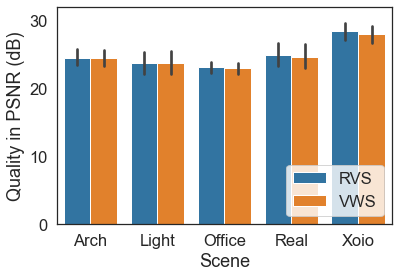

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


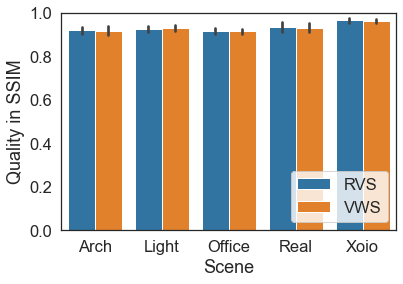

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


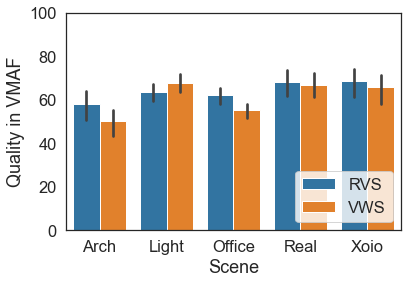

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


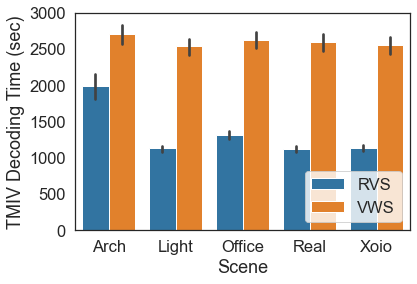

Arch vmaf and TMIV decoding time
RVS-based:  57.93778220555555 , 1992.605
VWS:  50.066997613333335 , 2705.3364
Light vmaf and TMIV decoding time
RVS-based:  63.47131475777778 , 1128.7473000000002
VWS:  67.59439976666667 , 2536.5043
Office vmaf and TMIV decoding time
RVS-based:  61.97551927111111 , 1311.6832
VWS:  55.15351040666667 , 2624.4394
Real vmaf and TMIV decoding time
RVS-based:  68.1461556688889 , 1122.1159000000002
VWS:  66.93925495666666 , 2596.5337
Xoio vmaf and TMIV decoding time
RVS-based:  68.48373022888889 , 1136.4443999999999
VWS:  65.85204251222223 , 2557.5228999999995


In [156]:
if __name__ == '__main__':
    main()